In [1]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
TRAIN_DIR = 'D:\\CVPR\\CIFAR-10-images\\test'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append([img_arr, class_num])
print(len(TRAIN_DATA))

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 3659.26it/s]

10000


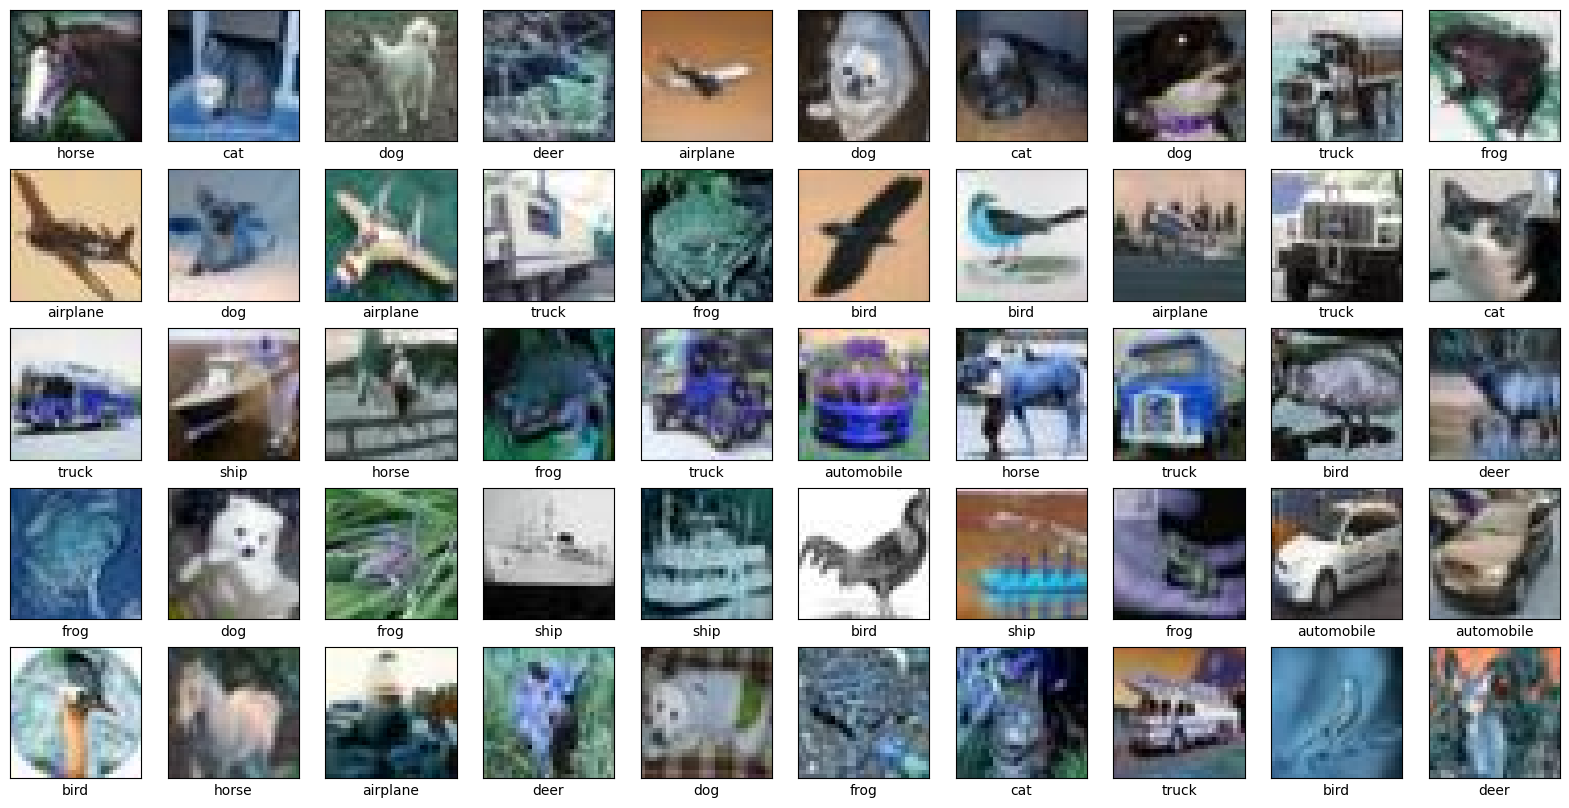

In [6]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i][0])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [7]:
f0 = TRAIN_DATA[0:200]
f1 = TRAIN_DATA[200:400]
f2 = TRAIN_DATA[400:600]
f3 = TRAIN_DATA[600:800]
f4 = TRAIN_DATA[800:1000]

In [9]:
print(f0)

[[array([[[ 10,  28,  27],
        [ 31,  49,  48],
        [ 38,  55,  52],
        ...,
        [ 51,  65,  77],
        [ 38,  52,  64],
        [ 25,  39,  51]],

       [[ 18,  36,  35],
        [ 22,  40,  39],
        [ 43,  60,  57],
        ...,
        [ 79,  88, 101],
        [ 54,  63,  76],
        [ 31,  40,  53]],

       [[ 36,  54,  53],
        [ 37,  55,  54],
        [ 64,  81,  78],
        ...,
        [110, 114, 125],
        [ 90,  94, 105],
        [ 69,  73,  84]],

       ...,

       [[ 23,  37,  33],
        [ 21,  34,  32],
        [ 39,  51,  51],
        ...,
        [ 19,  16,  18],
        [ 21,  14,  19],
        [ 19,  12,  17]],

       [[  1,  15,  13],
        [ 30,  44,  42],
        [ 44,  58,  57],
        ...,
        [ 14,  12,  12],
        [ 17,  10,  13],
        [ 19,  10,  13]],

       [[  0,  13,  11],
        [  9,  23,  21],
        [ 16,  29,  31],
        ...,
        [  8,   8,   8],
        [ 16,   7,  10],
        [ 18,   7,  10

In [10]:
import numpy as np
import matplotlib.pyplot as plt

k_max = 20

def l1_dist(x, y):
    return np.sum(np.abs(x - y))

def l2_dist(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def knn(train, validation, k):
    preds = []
    for v in validation:
        distances = []
        for t in train:
            l2 = l2_dist(v[0], t[0])
            distances.append((l2, t[1]))
        distances.sort(key=lambda x: x[0])
        neighbors = [d[1] for d in distances[:k]]
        counts = np.bincount(neighbors)
        pred = np.argmax(counts)
        preds.append(pred)
    return preds

mean_accuracies_l1 = []
std_accuracies_l1 = []
mean_accuracies_l2 = []
std_accuracies_l2 = []

for k in tqdm(range(1, k_max+1)):
    fold_accuracies_l1 = []
    fold_accuracies_l2 = []
    
    for i in range(5):
        if i == 0:
            train = f1+f2+f3+f4
            validation = f0
        elif i == 1:
            train = f0+f2+f3+f4
            validation = f1
        elif i == 2:
            train = f1+f0+f3+f4
            validation = f2
        elif i == 3:
            train = f1+f2+f0+f4
            validation = f3
        elif i == 4:
            train = f1+f2+f3+f0
            validation = f4

        acc_l1 = 0
        acc_l2 = 0

        for v in validation:
            l1_dists = []
            l2_dists = []
            for t in train:
                l1 = l1_dist(v[0], t[0])
                l2 = l2_dist(v[0], t[0])
                l1_dists.append((l1, t[1]))
                l2_dists.append((l2, t[1]))
            l1_dists.sort(key=lambda x: x[0])
            l2_dists.sort(key=lambda x: x[0])

            neighbors_l1 = [d[1] for d in l1_dists[:k]]
            counts_l1 = np.bincount(neighbors_l1)
            pred_l1 = np.argmax(counts_l1)

            neighbors_l2 = [d[1] for d in l2_dists[:k]]
            counts_l2 = np.bincount(neighbors_l2)
            pred_l2 = np.argmax(counts_l2)

            if pred_l1 == v[1]:
                acc_l1 += 1
            if pred_l2 == v[1]:
                acc_l2 += 1

        fold_accuracies_l1.append(acc_l1 / len(validation))
        fold_accuracies_l2.append(acc_l2 / len(validation))

    mean_accuracies_l1.append(np.mean(fold_accuracies_l1))
    std_accuracies_l1.append(np.std(fold_accuracies_l1))
    mean_accuracies_l2.append(np.mean(fold_accuracies_l2))
    std_accuracies_l2.append(np.std(fold_accuracies_l2))

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [10:30<00:00, 31.52s/it]


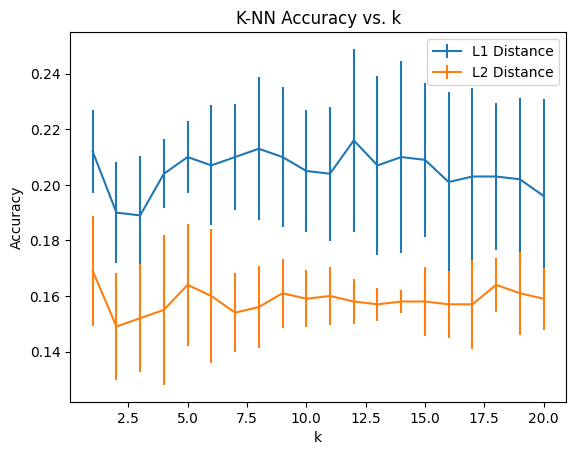

In [11]:
plt.errorbar(range(1, k_max+1), mean_accuracies_l1, yerr=std_accuracies_l1, label="L1 Distance")
plt.errorbar(range(1, k_max+1), mean_accuracies_l2, yerr=std_accuracies_l2, label="L2 Distance")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("K-NN Accuracy vs. k")
plt.legend()
plt.show()

In [15]:
# Computing midpoint accuracies for L1 and L2 distances
midpoint_l1_accuracies = []
midpoint_l2_accuracies = []

for i in range(5):
    if i==0:
        train = f1+f2+f3+f4
        validation = f0
    elif i==1:
        train = f0+f2+f3+f4
        validation = f1
    elif i==2:
        train = f0+f1+f3+f4
        validation = f2
    elif i==3:
        train = f0+f1+f2+f4
        validation = f3
    elif i==4:
        train = f0+f1+f2+f3
        validation = f4

    l1_accuracies = []
    l2_accuracies = []
    for k in k_values:
        l1_correct = 0
        l2_correct = 0
        total = 0
        for v in tqdm(validation):
            v_img = v[0]
            v_label = v[1]
            l1_scores = []
            l2_scores = []
            for t in train:
                t_img = t[0]
                t_label = t[1]
                # L1 distance
                l1_dist = np.sum(np.abs(t_img - v_img))
                l1_scores.append((l1_dist, t_label))
                # L2 distance
                l2_dist = np.sqrt(np.sum((t_img - v_img) ** 2))
                l2_scores.append((l2_dist, t_label))
            sorted_l1_scores = sorted(l1_scores, key=lambda x: x[0])[:k]
            l1_neighbors = [s[1] for s in sorted_l1_scores]
            l1_prediction = max(set(l1_neighbors), key=l1_neighbors.count)

            sorted_l2_scores = sorted(l2_scores, key=lambda x: x[0])[:k]
            l2_neighbors = [s[1] for s in sorted_l2_scores]
            l2_prediction = max(set(l2_neighbors), key=l2_neighbors.count)
            if l1_prediction == v_label:
                l1_correct += 1
            if l2_prediction == v_label:
                l2_correct += 1

            total += 1

        l1_accuracy = l1_correct / total
        l1_accuracies.append(l1_accuracy)

        l2_accuracy = l2_correct / total
        l2_accuracies.append(l2_accuracy)

        print("Fold {}, k = {}, L1 accuracy = {:.2f}%, L2 accuracy = {:.2f}%".format(i, k, l1_accuracy * 100, l2_accuracy * 100))

    min_l1_accuracy = min(l1_accuracies)
    max_l1_accuracy = max(l1_accuracies)
    midpoint_l1_accuracy = (min_l1_accuracy + max_l1_accuracy) / 2
    midpoint_l1_accuracies.append(midpoint_l1_accuracy)

    min_l2_accuracy = min(l2_accuracies)
    max_l2_accuracy = max(l2_accuracies)
    midpoint_l2_accuracy = (min_l2_accuracy + max_l2_accuracy) / 2
    midpoint_l2_accuracies.append(midpoint_l2_accuracy)

    print("Midpoint L1 accuracy for Fold {} = {:.2f}%, Midpoint L2 accuracy for Fold {} = {:.2f}%".format(i, midpoint_l1_accuracy * 100, i, midpoint_l2_accuracy * 100))


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:04<00:00, 41.18it/s]


Fold 0, k = 1, L1 accuracy = 17.00%, L2 accuracy = 14.50%


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:04<00:00, 42.34it/s]


Fold 0, k = 3, L1 accuracy = 15.00%, L2 accuracy = 15.50%


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:04<00:00, 40.76it/s]


Fold 0, k = 5, L1 accuracy = 18.50%, L2 accuracy = 18.00%
Midpoint L1 accuracy for Fold 0 = 16.75%, Midpoint L2 accuracy for Fold 0 = 16.25%


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:04<00:00, 40.13it/s]


Fold 1, k = 1, L1 accuracy = 15.00%, L2 accuracy = 15.50%


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:05<00:00, 39.86it/s]


Fold 1, k = 3, L1 accuracy = 16.00%, L2 accuracy = 15.50%


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 33.29it/s]


Fold 1, k = 5, L1 accuracy = 12.50%, L2 accuracy = 15.50%
Midpoint L1 accuracy for Fold 1 = 14.25%, Midpoint L2 accuracy for Fold 1 = 15.50%


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 33.30it/s]


Fold 2, k = 1, L1 accuracy = 17.50%, L2 accuracy = 16.00%


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:07<00:00, 27.89it/s]


Fold 2, k = 3, L1 accuracy = 17.00%, L2 accuracy = 14.50%


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 32.14it/s]


Fold 2, k = 5, L1 accuracy = 17.50%, L2 accuracy = 16.00%
Midpoint L1 accuracy for Fold 2 = 17.25%, Midpoint L2 accuracy for Fold 2 = 15.25%


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:05<00:00, 33.63it/s]


Fold 3, k = 1, L1 accuracy = 16.00%, L2 accuracy = 19.00%


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 28.84it/s]


Fold 3, k = 3, L1 accuracy = 18.00%, L2 accuracy = 15.00%


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:05<00:00, 34.35it/s]


Fold 3, k = 5, L1 accuracy = 18.50%, L2 accuracy = 14.50%
Midpoint L1 accuracy for Fold 3 = 17.25%, Midpoint L2 accuracy for Fold 3 = 16.75%


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:05<00:00, 34.42it/s]


Fold 4, k = 1, L1 accuracy = 15.00%, L2 accuracy = 19.50%


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:05<00:00, 34.46it/s]


Fold 4, k = 3, L1 accuracy = 13.00%, L2 accuracy = 17.00%


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:05<00:00, 33.97it/s]

Fold 4, k = 5, L1 accuracy = 14.50%, L2 accuracy = 19.00%
Midpoint L1 accuracy for Fold 4 = 14.00%, Midpoint L2 accuracy for Fold 4 = 18.25%


In [12]:
k_values = [1, 3, 5, 7, 9]
nfolds = 5

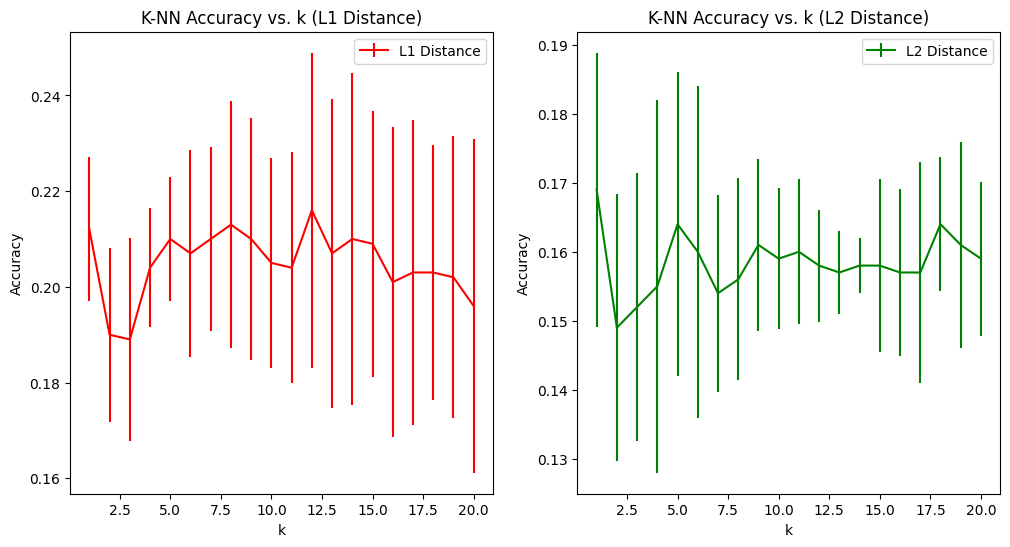

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for L1 distance
ax1.errorbar(range(1, k_max+1), mean_accuracies_l1, yerr=std_accuracies_l1, label="L1 Distance", color="red")
ax1.set_xlabel("k")
ax1.set_ylabel("Accuracy")
ax1.set_title("K-NN Accuracy vs. k (L1 Distance)")
ax1.legend()

# Plot for L2 distance
ax2.errorbar(range(1, k_max+1), mean_accuracies_l2, yerr=std_accuracies_l2, label="L2 Distance", color="green")
ax2.set_xlabel("k")
ax2.set_ylabel("Accuracy")
ax2.set_title("K-NN Accuracy vs. k (L2 Distance)")
ax2.legend()

plt.show()